In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom, beta, uniform, gamma, poisson,nbinom
import seaborn as sns

In [2]:
wd = '/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/data'
ybach = np.genfromtxt('{}/menchild30bach.dat'.format(wd))
ynobach = np.genfromtxt('{}/menchild30nobach.dat'.format(wd))

In [3]:
at = 2
bt = 1
ag = np.array([8,16,32,64,128])
bg = np.array([8,16,32,64,128])
size = 5000

In [4]:
def Gibbs(at, bt, ag, bg, yA, yB, size):
    theta = np.zeros(size+1)
    g = np.ones(size+1)
    for s in range(1, size+1):
        theta[s] = gamma.rvs(a=at+sum(yA)+sum(yB), scale=1/(bt+len(yA)+len(yB)*g[s-1]), size=1)
        g[s] = gamma.rvs(a=ag+sum(yB), scale=1/(bg+len(yB)*theta[s]), size=1)
    return theta[1:], g[1:]

In [6]:
theta = np.empty((len(ag), size))
g = np.empty((len(ag), size))
for i in range(len(ag)):
    theta[i], g[i] = Gibbs(at, bt, ag[i], bg[i], ybach, ynobach, size)

In [10]:
tA = np.copy(theta)
tB = np.copy(theta*g)

In [46]:
theta

array([[1.32451237, 1.19467332, 1.11378264, ..., 0.98691739, 0.99844845,
        0.93604983],
       [1.35985203, 1.30890369, 1.23220396, ..., 0.99489053, 0.99996942,
        0.97260929],
       [1.29393079, 1.17032033, 1.18574165, ..., 0.89933017, 0.93636321,
        0.86415359],
       [1.26683348, 1.21586664, 1.1314847 , ..., 1.19540451, 1.20056656,
        1.20573509],
       [1.3156351 , 1.28307251, 1.12852723, ..., 1.11157926, 1.16255357,
        1.25721722]])

In [50]:
E = np.mean(tB-tA, axis = 1)

In [51]:
E

array([0.38397659, 0.33316632, 0.2733357 , 0.19468421, 0.13499798])

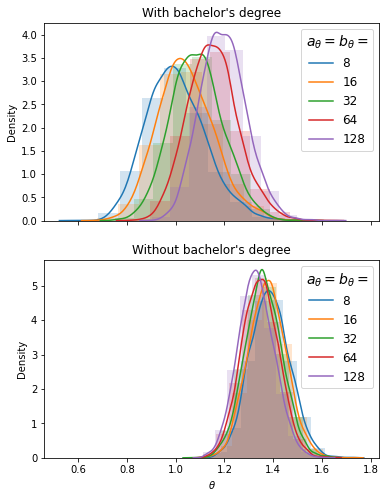

In [47]:
fig, ax = plt.subplots(2,1, figsize = (6,8), sharex = True)

for i in range(len(ag)):
    ax[0].hist(tA[i], density= True, alpha = 0.2)
    sns.kdeplot(tA[i], ax = ax[0], color='C{}'.format(i), label = ag[i])
    ax[0].legend(fontsize = 12, title = '$ a_{\\theta} = b_{\\theta} =$', title_fontsize=14)
    
    ax[1].hist(tB[i], density= True, alpha = 0.2)
    sns.kdeplot(tB[i], ax = ax[1], color='C{}'.format(i), label = ag[i])
    ax[1].legend(fontsize = 12, title = '$ a_{\\theta} = b_{\\theta} =$', title_fontsize=14)
    
#     ax[2].hist(g[i], density= True, label = ag[i], alpha = 0.2)
#     sns.kdeplot(g[i], ax = ax[2], color='C{}'.format(i))
#     ax[2].legend(fontsize = 12, title = '$ a_{\\theta} = b_{\\theta} =$', title_fontsize=14)

    ax[0].set(title = "With bachelor's degree", xlabel = '$\\theta$', ylabel = 'Density')
    ax[1].set(title = "Without bachelor's degree", xlabel = '$\\theta$', ylabel = 'Density')

plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex4_2_Fig1.png')

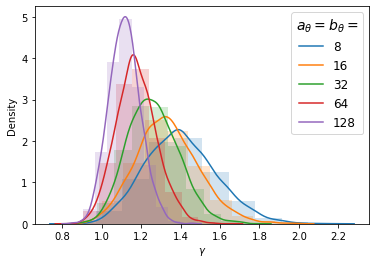

In [49]:
plt.figure(figsize = (6,4))
for i in range(len(ag)):
    
    plt.hist(g[i], density= True, alpha = 0.2)
    sns.kdeplot(g[i], color='C{}'.format(i), label = ag[i])
    plt.legend(fontsize = 12, title = '$ a_{\\theta} = b_{\\theta} =$', title_fontsize=14)
    plt.xlabel('$\gamma$')
    plt.ylabel('Density')

plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex4_2_Fig2.png')

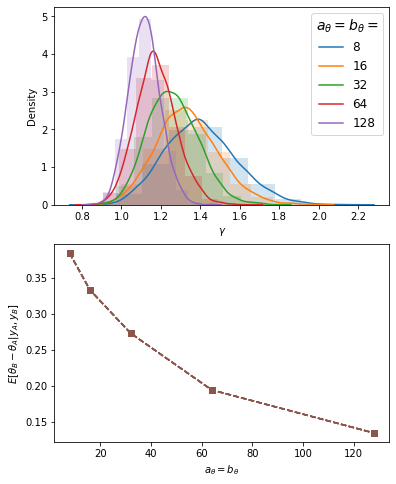

In [64]:
fig, ax = plt.subplots(2,1, figsize = (6,8))

for i in range(len(ag)):
    ax[0].hist(g[i], density= True, alpha = 0.2)
    sns.kdeplot(g[i], ax = ax[0], color='C{}'.format(i), label = ag[i])
    ax[0].legend(fontsize = 12, title = '$ a_{\\theta} = b_{\\theta} =$', title_fontsize=14)
    ax[1].plot(ag, E, '--s', c = 'C5')
    
    ax[0].set(xlabel = '$\gamma$', ylabel = 'Density')
    ax[1].set(xlabel = '$a_{\\theta} = b_{\\theta}$', ylabel = '$E[\\theta_B - \\theta_A | y_A, y_B]$') #  xscale = 'log'

plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex4_2_Fig3.png')